In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    explained_variance_score
)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

df = pd.read_csv('Data UTS copy 2.csv')

df

,Provinsi,Underemployment,indeks_daya_saing_digital,PDRB per kapita,IPM,UMP,Tahun
0,ACEH,16.18,27.3,31633,71.99,3165031.0,2020
1,SUMATERA UTARA,10.43,31.3,54979,71.77,2499423.0,2020
2,SUMATERA BARAT,12.93,31.0,43826,72.38,2484041.0,2020
3,RIAU,11.87,28.7,114167,72.71,2888564.0,2020
4,JAMBI,11.25,27.0,57958,71.29,2630162.0,2020
...,...,...,...,...,...,...,...
165,SULAWESI BARAT,12.09,30.3,42718,68.20,2914958.0,2024
166,MALUKU,12.12,36.1,32198,71.57,2949953.0,2024
167,MALUKU UTARA,9.14,31.1,70660,71.03,3200000.0,2024
168,PAPUA BARAT,10.90,32.6,131636,67.02,3393000.0,2024


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   170 non-null    object 
 1   Underemployment            170 non-null    float64
 2   indeks_daya_saing_digital  170 non-null    float64
 3   PDRB per kapita            170 non-null    int64  
 4   IPM                        170 non-null    float64
 5   UMP                        170 non-null    float64
 6   Tahun                      170 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [3]:
print("Duplikat:", df.duplicated().sum())
print("Missing:\n", df.isnull().sum())


Duplikat: 0
Missing:
 Provinsi                     0
Underemployment              0
indeks_daya_saing_digital    0
PDRB per kapita              0
IPM                          0
UMP                          0
Tahun                        0
dtype: int64


In [4]:
df.describe()


,Underemployment,indeks_daya_saing_digital,PDRB per kapita,IPM,UMP,Tahun
count,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000
mean,8.590706,37.854706,74914.605882,72.232118,2.806050e+06,2022.000000
std,2.921679,10.648338,57774.733022,3.709682,5.910080e+05,1.418391
min,2.350000,17.700000,20057.000000,60.440000,1.704608e+06,2020.000000
25%,6.407500,30.925000,43763.250000,70.322500,2.448299e+06,2021.000000
50%,8.375000,35.900000,56844.000000,72.170000,2.805248e+06,2022.000000
75%,10.430000,42.600000,73843.500000,73.475000,3.166314e+06,2023.000000
max,16.830000,79.700000,344350.000000,83.080000,5.067381e+06,2024.000000


# Uji asumsi

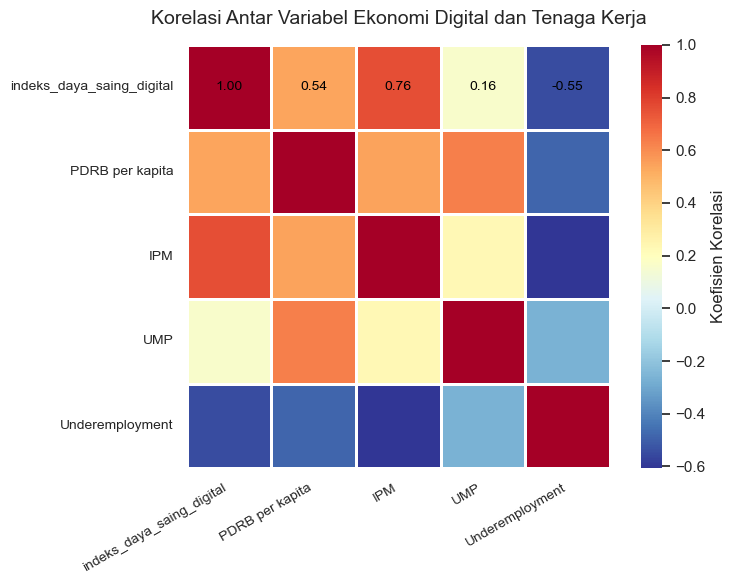

In [ ]:
cols = ['indeks_daya_saing_digital', 'PDRB per kapita', 'IPM', 'UMP', 'Underemployment']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.set_theme(style="white", context="notebook")

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",
    linewidths=0.8,
    linecolor="white",
    cbar_kws={'label': 'Koefisien Korelasi'},
    square=True,
    annot_kws={"size": 10, "color": "black"}
)

plt.title("Korelasi Antar Variabel Ekonomi Digital dan Tenaga Kerja", fontsize=14, pad=15)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['indeks_daya_saing_digital', 'PDRB per kapita', 'IPM','UMP']]
X = sm.add_constant(X)  # Tambah konstanta
vif = pd.DataFrame()
vif["Variabel"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variabel,VIF
0,const,768.306474
1,indeks_daya_saing_digital,2.594603
2,PDRB per kapita,2.550246
3,IPM,2.498377
4,UMP,1.795698


# Machine Learning Models

Training RandomForest ...

📊 Model Evaluation: RandomForest
🔹 R² Train Score       : 0.8253
🔹 R² Test Score        : 0.7036
🔹 Adjusted R² (Test)   : 0.6627
🔹 MAE                  : 1.2622
🔹 MSE                  : 2.7535
🔹 RMSE                 : 1.6594
🔹 Explained Variance   : 0.7043
🔹 MAPE                 : 18.82%

⚠ Overfitting Analysis
------------------------------------------------------------
🔸 R² Train-Test Difference: 0.1217
⚠ Caution: moderate difference



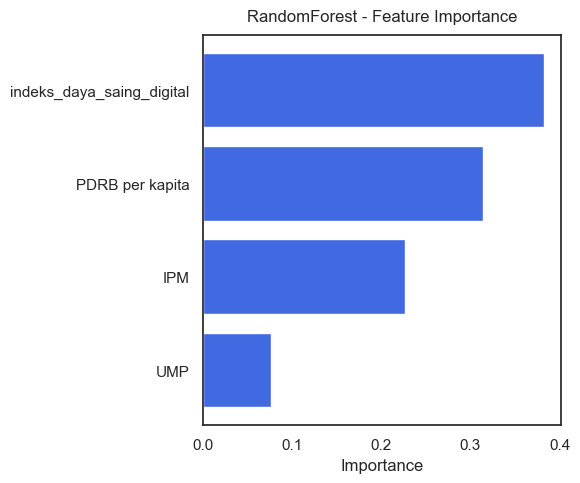

Training XGBoost ...

📊 Model Evaluation: XGBoost
🔹 R² Train Score       : 0.9142
🔹 R² Test Score        : 0.7031
🔹 Adjusted R² (Test)   : 0.6622
🔹 MAE                  : 1.3232
🔹 MSE                  : 2.7574
🔹 RMSE                 : 1.6606
🔹 Explained Variance   : 0.7038
🔹 MAPE                 : 18.91%

⚠ Overfitting Analysis
------------------------------------------------------------
🔸 R² Train-Test Difference: 0.2111
❌ Warning: Model might be overfitting (significant difference)



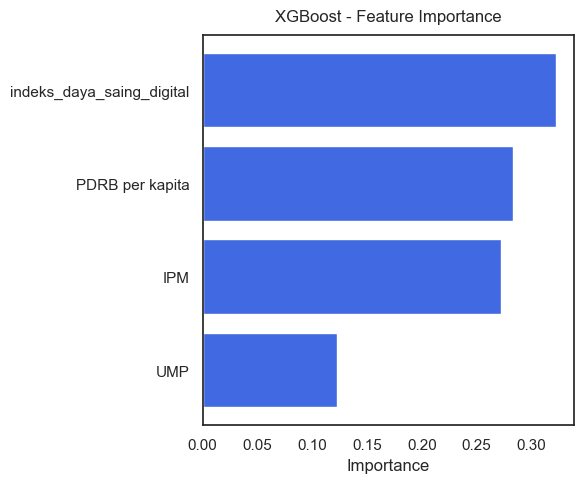

Training CatBoost ...

📊 Model Evaluation: CatBoost
🔹 R² Train Score       : 0.9441
🔹 R² Test Score        : 0.7702
🔹 Adjusted R² (Test)   : 0.7385
🔹 MAE                  : 1.1016
🔹 MSE                  : 2.1345
🔹 RMSE                 : 1.4610
🔹 Explained Variance   : 0.7727
🔹 MAPE                 : 17.10%

⚠ Overfitting Analysis
------------------------------------------------------------
🔸 R² Train-Test Difference: 0.1739
⚠ Caution: moderate difference



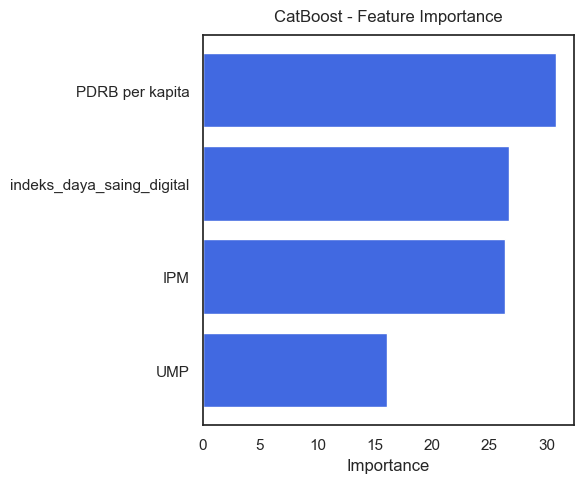

Training GradientBoosting ...

📊 Model Evaluation: GradientBoosting
🔹 R² Train Score       : 0.9588
🔹 R² Test Score        : 0.6878
🔹 Adjusted R² (Test)   : 0.6447
🔹 MAE                  : 1.3285
🔹 MSE                  : 2.9000
🔹 RMSE                 : 1.7030
🔹 Explained Variance   : 0.6954
🔹 MAPE                 : 19.14%

⚠ Overfitting Analysis
------------------------------------------------------------
🔸 R² Train-Test Difference: 0.2710
❌ Warning: Model might be overfitting (significant difference)



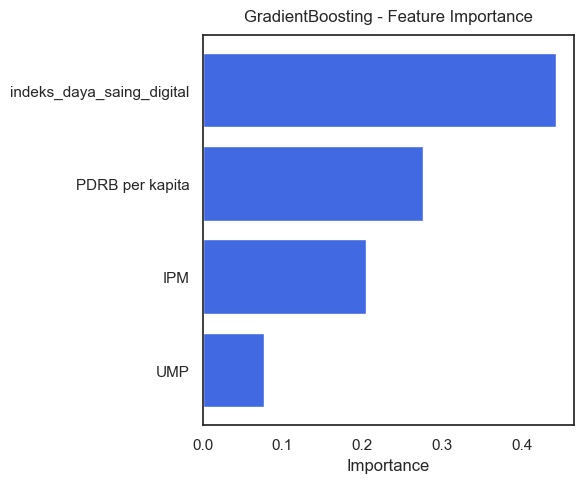


📈 Model Comparison (sorted by R² Test)
              Model   R² Test    Adj R²      RMSE       MAE   MAPE (%)
0          CatBoost  0.770206  0.738511  1.461007  1.101565  17.099987
1      RandomForest  0.703571  0.662685  1.659371  1.262219  18.821468
2           XGBoost  0.703149  0.662204  1.660553  1.323184  18.910853
3  GradientBoosting  0.687797  0.644734  1.702950  1.328508  19.141248



In [ ]:
# Models: RandomForest, XGBoost, CatBoost, GradientBoosting

def adjusted_r2(r2, n, p):
    """Adjusted R²: n = n_samples, p = n_features"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


def mape(y_true, y_pred):
    """Mean Absolute Percentage Error"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


def print_metrics(name, y_train, y_train_pred, y_test, y_test_pred, n_features):
    """Print and return model evaluation metrics"""
    r2_tr = r2_score(y_train, y_train_pred)
    r2_te = r2_score(y_test, y_test_pred)
    adj_r2 = adjusted_r2(r2_te, len(y_test), n_features)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse ** 0.5
    evs = explained_variance_score(y_test, y_test_pred)
    mape_v = mape(y_test, y_test_pred)

    print("\n" + "="*60)
    print(f"📊 Model Evaluation: {name}")
    print("="*60)
    print(f"🔹 R² Train Score       : {r2_tr:.4f}")
    print(f"🔹 R² Test Score        : {r2_te:.4f}")
    print(f"🔹 Adjusted R² (Test)   : {adj_r2:.4f}")
    print(f"🔹 MAE                  : {mae:.4f}")
    print(f"🔹 MSE                  : {mse:.4f}")
    print(f"🔹 RMSE                 : {rmse:.4f}")
    print(f"🔹 Explained Variance   : {evs:.4f}")
    print(f"🔹 MAPE                 : {mape_v:.2f}%")

    diff = r2_tr - r2_te
    print("\n⚠ Overfitting Analysis")
    print("-"*60)
    print(f"🔸 R² Train-Test Difference: {diff:.4f}")
    if diff > 0.2:
        print("❌ Warning: Model might be overfitting (significant difference)")
    elif diff > 0.05:
        print("⚠ Caution: moderate difference")
    else:
        print("✅ Train/test R² similar — good generalization")
    print("="*60 + "\n")

    return {
        "r2_train": r2_tr, "r2_test": r2_te, "adj_r2_test": adj_r2,
        "mae": mae, "mse": mse, "rmse": rmse, "mape": mape_v, "evs": evs
    }


def plot_feature_importance(feature_names, importances, title="Feature Importance"):
    """Visualize feature importance"""
    order = np.argsort(importances)
    plt.figure(figsize=(6, 3 + 0.5 * len(importances)))
    plt.barh(np.array(feature_names)[order], importances[order], color='royalblue')
    plt.title(title, fontsize=12, pad=10)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
    plt.close('all')  

features = ['indeks_daya_saing_digital', 'PDRB per kapita', 'IPM', 'UMP']
target = 'Underemployment'

X = df[features].copy()
y = df[target].copy()

# Scaling (robust to outliers)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Model Definitions

rf = RandomForestRegressor(
    n_estimators=300, max_depth=6,
    min_samples_split=5, min_samples_leaf=3,
    random_state=42, n_jobs=-1
)

xgb = XGBRegressor(
    n_estimators=200,      
    max_depth=3,           
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2,         
    reg_alpha=1,
    random_state=42
)


cat = CatBoostRegressor(
    iterations=400, learning_rate=0.05, depth=4,
    l2_leaf_reg=3, silent=True, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42
)

models = {
    "RandomForest": rf,
    "XGBoost": xgb,
    "CatBoost": cat,
    "GradientBoosting": gbr
}

# Model Training & Evaluation

results = {}

for name, model in models.items():
    print(f"Training {name} ...")
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation
    metrics = print_metrics(
        name, y_train, y_train_pred, y_test, y_test_pred, n_features=X.shape[1]
    )


    # Feature importance
    try:
        if name == "CatBoost":
            imp = model.get_feature_importance()
        else:
            imp = model.feature_importances_
        plot_feature_importance(features, imp, title=f"{name} - Feature Importance")
    except Exception as e:
        print("Feature importance not available:", e)

    results[name] = {"model": model, "metrics": metrics}

# Summary

summary = []
for name in results:
    m = results[name]['metrics']
    summary.append({
        "Model": name,
        "R² Test": m['r2_test'],
        "Adj R²": m['adj_r2_test'],
        "RMSE": m['rmse'],
        "MAE": m['mae'],
        "MAPE (%)": m['mape']
    })

summary_df = (
    pd.DataFrame(summary)
    .sort_values(by='R² Test', ascending=False)
    .reset_index(drop=True)
)

print("\n============================================================")
print("📈 Model Comparison (sorted by R² Test)")
print("============================================================")
print(summary_df)
print("============================================================\n")


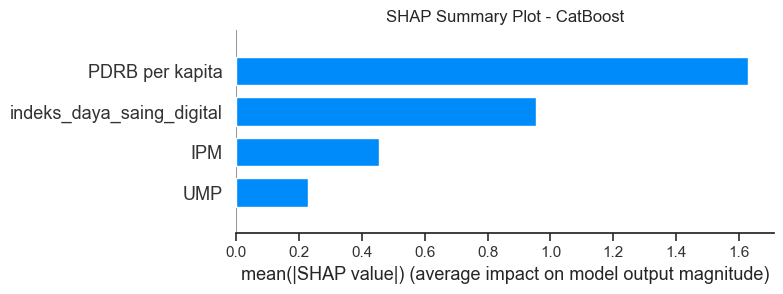

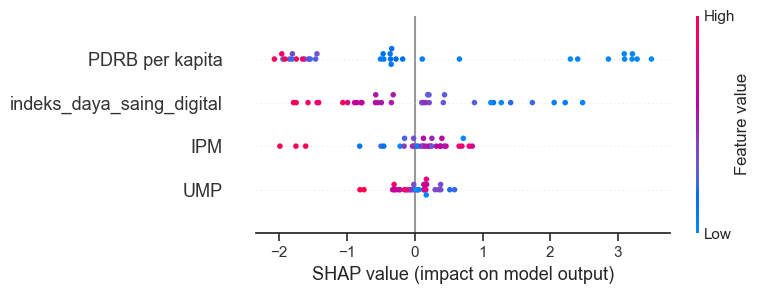

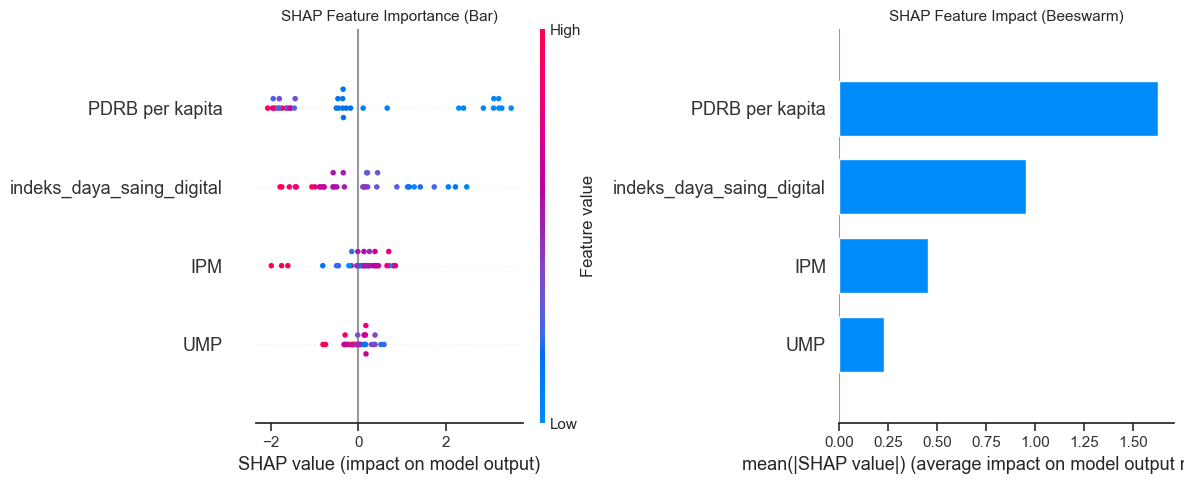

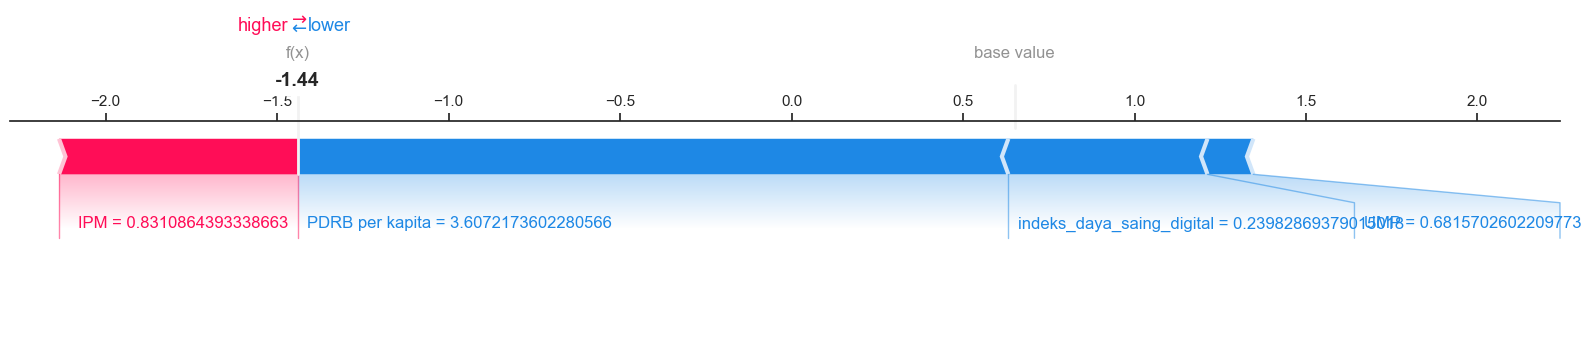

In [ ]:
import shap
explainer = shap.Explainer(cat, X_test)
shap_values = explainer(X_test)

plt.title("SHAP Summary Plot - CatBoost")
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
explainer = shap.Explainer(cat, X_test)
shap_values = explainer(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, plot_size=None)
plt.sca(axes[0])
axes[0].set_title("SHAP Feature Importance (Bar)", fontsize=11)

shap.summary_plot(shap_values, X_test, show=False, plot_size=None)
plt.sca(axes[1])
axes[1].set_title("SHAP Feature Impact (Beeswarm)", fontsize=11)

plt.tight_layout()
plt.show()
idx = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[idx].values,
    X_test.iloc[idx, :],
    matplotlib=True
)
